# Implementando un modelo de regresión lineal desde cero

## Introducción

Durante la segunda guerra mundial se debía planificar cuidadosamente cada operación que se realizaba para evitar que esta fracasara, por ello países como Estados Unidos registraron los datos relacionados con las condiciones climáticas de distintas zonas del campo de batalla con el fin de tener conocimientos sobre la temperatura del lugar, precipitaciones de lluvia, nieve, etc. Se tienen registros de 159 estaciones climáticas en diferentes días desde 1942 hasta 1945, si analizamos concretamente los datos correspondientes a la temperatura mínima y máxima de cada día, podemos ver que parece tener un comportamiento lineal. Tu trabajo es diseñar un modelo que intente predecir la máxima temperatura de cada día dada la temperatura mínima.

## Obteniendo la información
Lo primero que debemos hacer es obtener la información que necesitamos del conjunto de datos, y luego la graficaremos.

## Importando las librerías correspondientes

In [1]:
# Numpy: manejo de arreglos y matrices
import numpy as np
# Pandas: manejo de datos
import pandas as pd
# Matplotlib: gráficas
import matplotlib.pyplot as plt

## Obteniendo los datos
Para obtener la información del archivo .CSV utlizamos la función `read_csv()` y visualizamos unos cuantos datos utlizando `head()`.

In [2]:
dataset = pd.read_csv("weather.csv", low_memory=False)
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Obteniendo la información necesaria
Dado que no necesitamos toda la información del conjunto de datos, nos centraremos específicamente en las columnas de la temperatura máxima y la temperatura mínima. Vamos a guardar esa información en un DataFrame nuevo.

In [3]:
dataframe = pd.DataFrame()    # Creación del DataFrame
dataframe['Min Temp'] = dataset['MinTemp']
dataframe['Max Temp'] = dataset['MaxTemp']
dataframe.head()

,Min Temp,Max Temp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667


Podemos obtener más información acerca de los datos utlizando `info()`.

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Min Temp  119040 non-null  float64
 1   Max Temp  119040 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB


Como podemos ver, contamos con un total de 119040 datos de temperatura. En este momento no vamos a trabajar con toda esa cantidad de datos así que tomaremos una muestra aleatoria de los mismos y trabajaremos con esos datos. Para tomar una muestra utilizamos la función `sample()`.

In [5]:
m = 200    # Tamaño de la muestra

min_temp = dataframe['Min Temp'].sample(n=m, random_state = 5)    # Valores mínimos de temperatura (X)
max_temp = dataframe['Max Temp'].sample(n=m, random_state = 5)    # Valores máximos de temperatura (Y)

Convertiremos estos datos a un *Numpy Array* utilizando la función de Numpy ``to_numpy()`.

In [6]:
X = min_temp.to_numpy(dtype=np.float64)
X = np.reshape(X, (m,1))
y = max_temp.to_numpy(dtype=np.float64)
y = np.reshape(y, (m,1))

## Graficando la información
Ya tenemos los datos con los que vamos a trabajar, ahora vamos a realizar una gráfica de dispersión que represente la información de temperatura máxima contra temperatura mínima.

Para hacer una gráfica de dispersión utilizamos la función `scatter()` de matplotlib.

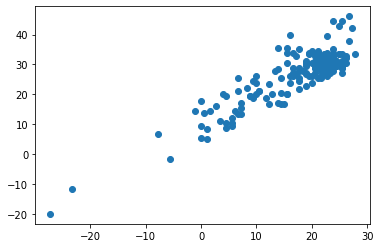

In [7]:
plt.scatter(X,y)

Podemos ver que los datos tienen un comportamiento lineal, por lo que ahora trabajaremos con nuestro modelo de regresión lineal.

## Implementando el modelo

Lo primero que haremos será plantear la hipótesis, dado que el modelo es lineal, la curva corresponde a una recta de la forma $y = mx + b$

### Hipótesis:  $h_w = w_0 + w_1x$

Los parámetros son los valores que modifican la curva, en este caso corresponden a la pendiente de la recta y su punto de corte con el eje $y$.

### Parametros: $w_0, w_1$

Defniniremos una función que corresponde a la hipótesis, esta recibe dos datos, el primero es el conjunto de datos de entrada (X) y el segundo es una lista con los parámetros de la hipótesis (w).

In [8]:
def h(X, w):
    return (w[1] * np.array(X[:, 0]) + w[0])

### Función de pérdida: $J(w_0, w_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{(i)})-y^{(i)})^2$
La función de pérdida es la que determina cuánto es el error del modelo, para este trabajo hemos elegido como función de pérdida la **mitad del error cuadrático medio**

In [9]:
def cost(w, X, y):
    return (.5 / m) * np.sum(np.square(h(X, w) - np.array(y)))

## ¿Cómo aprende el modelo?
Nuestra finalidad es disminuir el error que nos da como resultado la función de pérdida, para esto, aplicaremos la técnica del descenso del gradiente, que consiste en hallar el vector gradiente de la función y "moverse" (cambiar los parámetros) en dirección contraria a este. Para hallar el vector gradiente primero debemos hallar las derivadas parciales de la función de pérdida.

### Función de pérdida: $J(w_0, w_1) = \frac{1}{2m}\sum_{i=1}^{m}(w_0 + w_1\cdot x^{(i)}-y^{(i)})^2 $
$ \cfrac{\partial J}{\partial w_0} = \cfrac{1}{m}  \sum_{x=1}^{m} (w_0 + w_1\cdot x^{(i)}-y^{(i)})^2 \\ $
$ \cfrac{\partial J}{\partial w_1} = \cfrac{1}{m}  \sum_{x=1}^{m} (w_0 + w_1\cdot x^{(i)}-y^{(i)})^2 \cdot x^{(i)} $

El vector gradiente corresponde entonces a $ \left(\cfrac{\partial J}{\partial w_0}, \cfrac{\partial J}{\partial w_1} \right) $

Definimos la función `grad` que calcula el vector gradiente.

In [10]:
def grad(w, X, y):
    g = [0] * 2
    g[0] = (1 / m) * np.sum(h(X, w) - np.array(y))
    g[1] = (1 / m) * np.sum((h(X, w) - np.array(y)) * np.array(X[:, 0]))
    return g

## Aplicando el algoritmo
Para aplicar el algoritmo, debemos empezar con un vector $w = (w_0, w_1)$, calculamos el vector gradiente y le restamos este valor a al vector $w$, sin embargo, este valor debemos reducirlo o amplificarlo según el modelo, por esto debemos multiplicarlo por un valor constante: la taza de aprendizaje (learning rate).

Definimos la función `descent()` que se encargará de ejecutar el algoritmo.

In [11]:
def descent(w_new, w_prev, lr):
    # Imprimimos los valores iniciales de w y el coste
    print('Initial w = ', w_prev)
    print('Initial cost = ', cost(w_prev, X, y))
    print('\nLearning process')
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(w_prev, X, y)[0]
        w1 = w_prev[1] - lr * grad(w_prev, X, y)[1]
        w_new = [w0, w1]
        print('w = ', w_new)
        print('cost = ', cost(w_new, X, y))
        print()
        if (w_new[0] - w_prev[0]) ** 2 + (w_new[1] - w_prev[1]) ** 2 <= pow(10, -5):
            return w_new
        if j > 500:
            return w_new
        j += 1


# Iniciando el proceso de aprendizaje
Una vez definidas las funciones necesarias, ¡Ya podemos ejecutar nuestro modelo!

In [12]:
w = [0, 30] # Definimos un vector w inicial

w = descent(w, w, 0.000025)    # Ejecutamos el algoritmo

Initial w =  [0, 30]
Initial cost =  32267922.23874847

Learning process
w =  [-2.5398750000583505, -26.034279978717308]
cost =  29211860.89506579

w =  [-0.0729954219053619, 27.276351761905666]
cost =  26445428.320822697

w =  [-2.369760295628785, -23.44751685625421]
cost =  23941175.613827482

w =  [-0.13427655429244734, 24.810611462422784]
cost =  21674255.27904742

w =  [-2.2109759181577764, -21.106127731117788]
cost =  19622174.68617212

w =  [-0.18496240449108559, 22.578336867772997]
cost =  17764572.892674662

w =  [-2.062456865852962, -18.986857438625364]
cost =  16083018.617958704

w =  [-0.22606591227026152, 20.557402200455222]
cost =  14560827.364045396

w =  [-1.9232390538646549, -17.06865477008462]
cost =  13182895.868230589

w =  [-0.2585040021792826, 18.727778602381065]
cost =  11935552.24511428

w =  [-1.7924497501422498, -15.332463597884548]
cost =  10806420.331077827

w =  [-0.2831066832011633, 17.07133540411629]
cost =  9784296.885204172

w =  [-1.6692989177104842, -

w =  [3.2312747621793623, 1.0800713392768104]
cost =  17667.836855173042

w =  [3.2527320302527407, 1.0751252616140055]
cost =  17649.062212877514

w =  [3.274522831157459, 1.077898566063336]
cost =  17630.323480237308

w =  [3.295957507298602, 1.0733291615468716]
cost =  17611.620457157504

w =  [3.3176922582365775, 1.0757476369181243]
cost =  17592.952956621564

w =  [3.339102788802396, 1.0715193763867525]
cost =  17574.32080346271

w =  [3.3607831104352517, 1.0736168198199016]
cost =  17555.72383325163

w =  [3.38216809581396, 1.0696975409968548]
cost =  17537.161891289707

w =  [3.403795461990886, 1.0715045462743924]
cost =  17518.634831697476

w =  [3.425153641991564, 1.0678651346791477]
cost =  17500.142516589618

w =  [3.446729393650671, 1.0694093958175594]
cost =  17481.68481532801

w =  [3.468059634277519, 1.0660234959184656]
cost =  17463.261603845604

w =  [3.489584992029746, 1.0673300819875173]
cost =  17444.872764034306

w =  [3.510886273509805, 1.0641738357292692]
cost = 

cost =  14577.705351286088

w =  [7.131950059951058, 0.8994326621760212]
cost =  14564.623114491587

w =  [7.150003373632534, 0.8986062397349646]
cost =  14551.564913583908

w =  [7.168040075645663, 0.8977801522584112]
cost =  14538.530704402105

w =  [7.186060219195075, 0.8969552279670395]
cost =  14525.520442866378

w =  [7.2040637834042105, 0.8961306775013159]
cost =  14512.534084977915

w =  [7.222050817852559, 0.8953072505242974]
cost =  14499.571586818738

w =  [7.240021305057995, 0.89448423242137]
cost =  14486.63290455156

w =  [7.257975291315829, 0.8936623017432086]
cost =  14473.717994419634

w =  [7.275912762214066, 0.8928408115364583]
cost =  14460.826812746618

w =  [7.29383376107249, 0.8920203759790456]
cost =  14447.959315936403

w =  [7.311738276255678, 0.8912004093665504]
cost =  14435.11546047298

w =  [7.32962634838729, 0.890381467605051]
cost =  14422.295202920302

w =  [7.347497968342739, 0.889563020434453]
cost =  14409.49849992212

w =  [7.365353174302492, 0.8887

Despues de varias iteraciones, el modelo ha finalizado el proceso de aprendizaje, los resultados obtenidos son los siguientes:

In [13]:
print('Final w = ', w)
print('Final cost = ', cost(w, X, y))

Final w =  [9.07045979393628, 0.8106706323936388]
Final cost =  13231.046627823922


# Visualizando los datos obtenidos
Con los valores de los parámetros, podemos realizar la gráfica de la función lineal que representa. Para ello definimos una pequeña función que nos ayudará a graficar la linea recta y el gráfico de dispersión al mismo tiempo.

In [14]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)


def my_formula(x):
    return w[1] * x + w[0]

# Resultados obtenidos

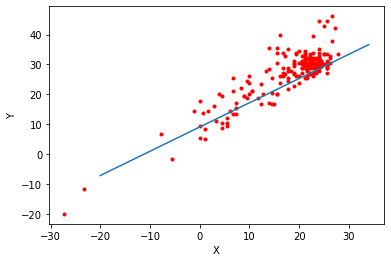

In [15]:
plt.scatter(X, y, c="red", marker=".")
graph(my_formula, range(-20, 35))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()